In [ ]:
#208 - solving Max-Cut
# https://en.wikipedia.org/wiki/Maximum_cut

In [2]:
import networkx as nx
import numpy as np

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit import BasicAer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import SPSA
from matplotlib import pyplot as plt

In [ ]:
# Generate a graph of 4 nodes
n = 4
graph = nx.Graph()
graph.add_nodes_from(np.arange(0, n, 1))
pos=nx.circular_layout(graph)
nx.draw(graph,pos)
plt.show()

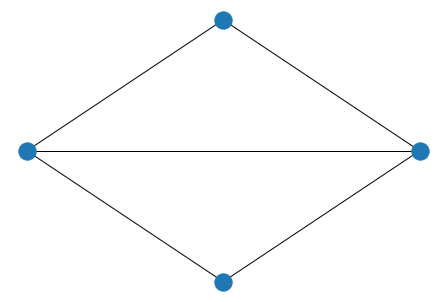

In [3]:
n = 4
graph = nx.Graph()
graph.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
graph.add_weighted_edges_from(elist)

pos=nx.circular_layout(graph)
nx.draw(graph,pos)
plt.show()

In [ ]:
#graph=nx.to_networkx_graph(adj)
#from matplotlib import pyplot as plt
#G=nx.Graph() #define G
pos=nx.circular_layout(graph)

#G=nx.path_graph(8)
nx.draw(graph,pos)
#plt.savefig("simple_path.png") # save as png
plt.show() # display

In [ ]:
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
graph.add_weighted_edges_from(elist)

# Compute the weight matrix from the graph
w = nx.adjacency_matrix(graph)

nx.draw(graph,pos)
plt.show() # display

In [ ]:
# Formulate the problem as quadratic program
problem = QuadraticProgram()
_ = [problem.binary_var('x{}'.format(i)) for i in range(n)]  # create n binary variables
linear = w.dot(np.ones(n))
quadratic = -w
problem.maximize(linear=linear, quadratic=quadratic)

In [ ]:
# Fix node 0 to be 1 to break the symmetry of the max-cut solution
problem.linear_constraint([1, 0, 0, 0], '==', 1)


In [ ]:
# Run quantum algorithm QAOA on qasm simulator
spsa = SPSA(maxiter=250)
backend = BasicAer.get_backend('qasm_simulator')
qaoa = QAOA(optimizer=spsa, reps=5, quantum_instance=backend)
algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(problem)
print(result)  # prints solution, x=[1, 0, 1, 0], the cost, fval=4